<a href="https://colab.research.google.com/github/andrew-vandy/cs5265-ml-foundations/blob/main/cs5265_asongate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS5265 Foundations of Machine Learning

## Background

Customer churn is a major issue eCommerce businesses face. It is defined as the percentage of customers lost over a given period of time. According to customer data at Gorgias, repeat customers account only 21% of customers, but generate 44% of revenue and 46% of orders. Therefore it has become increasingly important to identify and mitigate factors that cause customer churn.

Some of the challenges in building a predictive churn model are:

1. Lack of a "universal methodology": There are machine learning methods like classification that can be used which are efficient and caretorize complex data sets. Another technique is Survival Analysis, which can predict churn over a given period.

2. Exploratory Analysis: During the exploratory analysis phase, there could be missing information or lack of a robust attributes set.

3. Human Behavior: It is hard to predict human behavior. A customer may spend a lot of time browsing different products but eventually not purchasing anything. On the other hand, you might have a customer who knows exactly what they need, spending less time on the site but purchasing a lot more products.



## Project Description

The main topic of this project is to build a predictive model to perform customer churn analysis. We will use Binary Classification to determine if a customer will be lost(churn) or not. 

The data set to be used is here: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


So, we should be able to predict customer churn using the given data set.

## Performance Metrics

1. Confusion Matrix

  Presents the true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions. 

2. Accuracy

  It measures whether both positive and negative predictions were classified correctly.

  Accuracy = (tp + tn) / (tp + fp + tn + fn)


 3. Precision

  It measures the fraction of true positive predictions from all the positive predictions

  Precision = tp / (tp + fp)
  
4. True Positive Rate ( aka Recall )

  It measures the fraction of true positive predictions from all positive observations

  Recall = tp / (tp + fn)
  
5. F1 score

  This the harmonic mean of **Precision** and **Recall**

  F1 = 2 * ((Precision * Recall)/(Precision + Recall))


## Basic Exploratory Data Analysis

### Questions:
1.  What are we trying to predict?
2.  What kind of data do we have and what are the different types?
3.  What to do with missing values?

In [1]:
# import the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset
data = pd.read_csv('https://raw.githubusercontent.com/andrew-vandy/cs5265-ml-foundations/main/E_Commerce_Dataset.csv')

data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
# generate descriptive statistics

data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
# data frame summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# dimensionality

data.shape

(5630, 20)

In [6]:
# data types
datatype_columns = data.dtypes #type of each feature in data: int, float, object
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')] 
categorical_columns = datatype_columns[datatype_columns == 'object']

# numerical columns
print(numerical_columns)

CustomerID                       int64
Churn                            int64
Tenure                         float64
CityTier                         int64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object


In [5]:
# categorical columns

print(categorical_columns)

PreferredLoginDevice    object
PreferredPaymentMode    object
Gender                  object
PreferedOrderCat        object
MaritalStatus           object
dtype: object


<Axes: xlabel='PreferredPaymentMode', ylabel='count'>

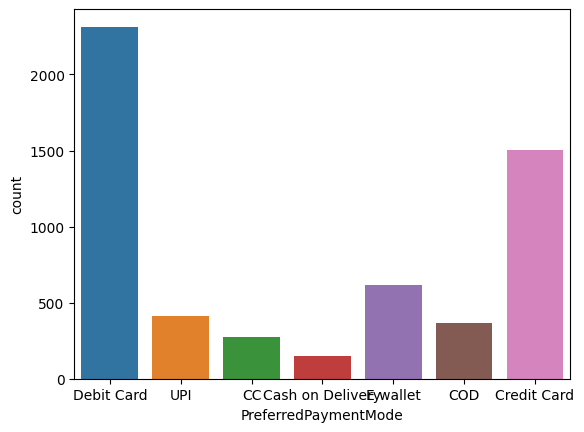

In [7]:
# Charts

sns.countplot(x=data["PreferredPaymentMode"])

<Axes: xlabel='PreferredLoginDevice', ylabel='count'>

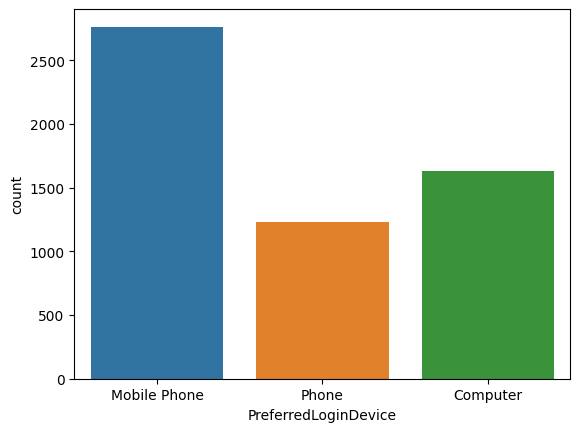

In [8]:
sns.countplot(x=data["PreferredLoginDevice"])

### Answers

1.  We are trying to predict whether a customer will churn based on a certain set of features
2.  We have both numerical and categorical data. The types of data are int64, float64 and object
3.  We will either drop incomplete observations or impute missing values

### Feature Engineering

Based on the basic EDA performed, the following features will be dropped:

*  CustomerId
*  Tenure
*  WarehouseToHome
*  HourSpendOnApp
*  NumberOfDeviceRegistered
*  PreferedOrderCat
*  MaritalStatus
*  NumberOfAddress

We will also be using the following transformations:

*  OneHotEncoder - to convert categorical to numerical data
*  Imputer - to fill in missing values
*  ColumnTransformer - to apply transformations on both numerical and categorical data

### Test-Train Split

 70 percent of the data will be put into a training set and 30 percent into a testing set.  

**Features**:  

*   PreferredLoginDevice  
*   CityTier 
*   PreferredPaymentMode  
*   Gender
*   SatisfactionScore 
*   Complain  
*   OrderAmountHikeFromlastYear 
*   CouponUsed  
*   OrderCount 
*   DaySinceLastOrder  
*   CashbackAmount 
                    
**Target**:  
*   Churn 



### Initial Pipeline

* OneHotEncoder to convert categorical data to numerical data
* SimpleImputer to fill missing values
* ColumnTransformer to apply transformations on both numerical and categorical data

### Model Fitting and Evaluation

Given the basic EDA performed above, I anticipate the model's performance to be acceptable. I will capture the performance metrics as we train the model.Through parameter tuning, I will aim to reduce the risk of under and over fitting.

### References ###

[Gorgias CX Growth Playbook](https://www.gorgias.com/guides/cx-growth-playbook)

[Chargebee - eCommerce Churn Rate](https://www.chargebee.com/blog/ecommerce-churn-rate/)

[Shopify - Churn Rate in eCommerce](https://www.shopify.com/blog/churn-rate-in-ecommerce)

[GainSight - Guide to Churn](https://www.gainsight.com/guides/the-essential-guide-to-churn/)


[Oracle - Challenges of building a predictive churn model](https://blogs.oracle.com/ai-and-datascience/post/the-challenges-of-building-a-predictive-churn-model)
